In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-support-ticket-dataset/customer_support_tickets.csv


In [61]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sn
import plotly 
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import pandas as pd
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('/kaggle/input/customer-support-ticket-dataset/customer_support_tickets.csv')
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [64]:
df.shape

(8469, 17)

In [65]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

The dataset is having null values in columns Resolution, First Response Time, Time to Resolution and Customer Satisfaction Rating. Since 

In [66]:
df.Resolution.unique

<bound method Series.unique of 0                                                 NaN
1                                                 NaN
2        Case maybe show recently my computer follow.
3       Try capital clearly never color toward story.
4                         West decision evidence bit.
                            ...                      
8464                                              NaN
8465                                              NaN
8466            Eight account century nature kitchen.
8467                            We seat culture plan.
8468                                              NaN
Name: Resolution, Length: 8469, dtype: object>

In [67]:
df['Customer Satisfaction Rating'].mean()

2.991332611050921

In [68]:
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(df['Customer Satisfaction Rating'].mean().round(1))

In [69]:
df['Customer Satisfaction Rating'].isnull().sum()

0

In [70]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,3.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,3.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [71]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating       0
dtype: int64

In [72]:
final_df = df[['Resolution', 'Customer Satisfaction Rating']]

In [73]:
final_df

,Resolution,Customer Satisfaction Rating
0,NaN,3.0
1,NaN,3.0
2,Case maybe show recently my computer follow.,3.0
3,Try capital clearly never color toward story.,3.0
4,West decision evidence bit.,1.0
...,...,...
8464,NaN,3.0
8465,NaN,3.0
8466,Eight account century nature kitchen.,3.0
8467,We seat culture plan.,3.0


In [74]:
final_df=final_df.dropna(axis=0)

In [75]:
final_df.isnull().sum()

Resolution                      0
Customer Satisfaction Rating    0
dtype: int64

In [76]:
final_df.shape

(2769, 2)

In [77]:
final_df.head()

,Resolution,Customer Satisfaction Rating
2,Case maybe show recently my computer follow.,3.0
3,Try capital clearly never color toward story.,3.0
4,West decision evidence bit.,1.0
10,Measure tonight surface feel forward.,1.0
11,Measure there house management pick knowledge ...,1.0


In [78]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2769 entries, 2 to 8467
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Resolution                    2769 non-null   object 
 1   Customer Satisfaction Rating  2769 non-null   float64
dtypes: float64(1), object(1)
memory usage: 64.9+ KB


In [79]:
df = final_df
df_n = final_df

In [80]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  2769


,Total Missing,In Percent
Resolution,0,0.0
Customer Satisfaction Rating,0,0.0


In [81]:
df.rename(columns={"Resolution": "support"}, inplace=True)
df.rename(columns={"Customer Satisfaction Rating": "rating"}, inplace=True)

In [82]:
df

,support,rating
2,Case maybe show recently my computer follow.,3.0
3,Try capital clearly never color toward story.,3.0
4,West decision evidence bit.,1.0
10,Measure tonight surface feel forward.,1.0
11,Measure there house management pick knowledge ...,1.0
...,...,...
8452,Interesting show must successful.,3.0
8453,Skill expect admit and.,5.0
8455,Say position key appear behavior.,1.0
8466,Eight account century nature kitchen.,3.0


In [83]:
df.shape

(2769, 2)

In [84]:
#Remove Hashtags
df['support'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
df['support'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
df['support'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

#to lowercase
df['support']=df['support'].str.lower()

In [85]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['support'] = df['support'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [86]:
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence.lower())
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop]
    stemmed_sentence = " ".join(stemmed_words)
    return stemmed_sentence
df["support"] = df["support"].apply(stem_sentence)

In [87]:
def punctuations_removal(text):
    puntuations = "[\.\?!,;:]+"
    text = re.sub(puntuations,"",text)
    return text

df['support'] = df['support'].apply(lambda x: punctuations_removal(x))

In [88]:
y = df['rating']
x = df['support']

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])
    
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names_out()
denselist1 = X1.todense().tolist()
df = pd.DataFrame(denselist1, columns=feature_names1)

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [91]:
df

,abil,abl,accept,accord,account,across,act,action,activ,actual,...,would,write,writer,wrong,yard,ye,yeah,year,yet,young
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2765,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2767,0.0,0.0,0.0,0.0,0.470827,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
x

2              case mayb show recent comput follow 
3       tri capit clearli never color toward stori 
4                              west decis evid bit 
10              measur tonight surfac feel forward 
11           measur hous manag pick knowledg trade 
                           ...                     
8452                    interest show must success 
8453                            skill expect admit 
8455                 say posit key appear behavior 
8466           eight account centuri natur kitchen 
8467                              seat cultur plan 
Name: support, Length: 2769, dtype: object

In [93]:
y

2       3.0
3       3.0
4       1.0
10      1.0
11      1.0
       ... 
8452    3.0
8453    5.0
8455    1.0
8466    3.0
8467    3.0
Name: rating, Length: 2769, dtype: float64

In [94]:
# splitting the training and testing part from the data
X_temp, X_test, y_temp, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

In [95]:
# For creating a table of the accuracies in the end
accuracy = {'TF-IDF':[]}

In [96]:
X_test

,abil,abl,accept,accord,account,across,act,action,activ,actual,...,would,write,writer,wrong,yard,ye,yeah,year,yet,young
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.367566,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# Linear Regression
regressor_LL_tf = LinearRegression()
regressor_LL_tf.fit(X_temp, y_temp)
y_predict_LL_tf = regressor_LL_tf.predict(X_test)
a=(regressor_LL_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

# Logistic Regression
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

# Decision Tree
model_DT_tf = DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_temp, y_temp)
y_predict_DT_tf = model_DT_tf.predict(X_test)
a=(model_DT_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

# Random Forest
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_temp, y_temp)
y_predict_RF_tf = model_RF_tf.predict(X_test)
a=(model_RF_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

# K-Neighbors Classifier
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)
y_predict_KN_tf = model_KN_tf.predict(X_test)
a=(model_KN_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

# Evaluation
model = ['Linear','Logistic','DT','RF','KN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)

In [98]:
compare_models

,model,accuracy
0,Linear,-0.609135
1,Logistic,0.200361
2,DT,0.203971
3,RF,0.184116
4,KN,0.203971


In [99]:
compare_models["accuracy"].tolist()

[-0.6091348951246218,
 0.2003610108303249,
 0.20397111913357402,
 0.18411552346570398,
 0.20397111913357402]

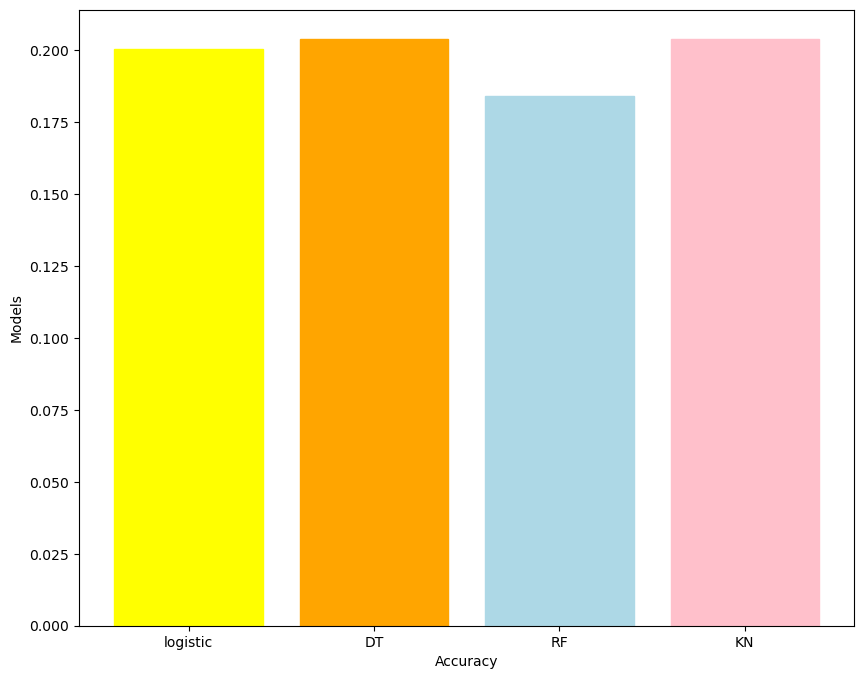

In [100]:
model = ['logistic','DT','RF','KN']
acc = compare_models["accuracy"].tolist()
plt.figure(figsize=(10,8))
graph = plt.bar(model,acc[1:])
plt.xlabel('Accuracy')
plt.ylabel('Models')    
#graph[0].set_color('green')
graph[0].set_color('yellow')
graph[1].set_color('orange')
graph[2].set_color('lightblue')
graph[3].set_color('pink')

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [102]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}
log = LogisticRegression(random_state=42, solver='liblinear')
grid_search = GridSearchCV(estimator=log, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Best accuracy:  0.23205417607223477


In [103]:
param_grid = {
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy:  0.20902934537246048


In [104]:
param_grid = {
    'n_estimators': [50],
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:  0.21038374717832956


In [105]:
param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 3, 'weights': 'uniform'}
Best accuracy:  0.19909706546275396


In [106]:
df_n
df_train = df_n[:2500]
df_test = df_n[2500:]

In [107]:
# Create X, y arrays
from sklearn.model_selection import train_test_split

# Training data
X_train = df_train["support"].values
y_train = df_train["rating"].values

# Split into train/test sets
X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Test data
X_te = df_test["support"].values

print("Training data:", X_tr.shape, y_tr.shape)
print("Validation data:", X_va.shape, y_va.shape)
print("Test data:", X_te.shape)

Training data: (2000,) (2000,)
Validation data: (500,) (500,)
Test data: (269,)


In [108]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    
    strategy = tf.distribute.experimental.TPUStrategy
except ValueError:
    strategy = tf.distribute.get_strategy() 
    print('Number of replicas:', strategy.num_replicas_in_sync) 

Number of replicas: 1


In [109]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")
    
if tpu:
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu,) 
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
    strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
    print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
    strategy = tf.distribute.get_strategy() 
    print('Running on single GPU ', gpus[0].name)
else:
    strategy = tf.distribute.get_strategy() 
    print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on CPU
Number of accelerators:  1


In [110]:
%%time

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_tr)

max_seq_length = 250

X_tr_seq = tokenizer.texts_to_sequences(X_tr)
X_tr_seq = pad_sequences(X_tr_seq, maxlen=max_seq_length)

X_va_seq = tokenizer.texts_to_sequences(X_va)
X_va_seq = pad_sequences(X_va_seq, maxlen=max_seq_length)

X_te_seq = tokenizer.texts_to_sequences(X_te)
X_te_seq = pad_sequences(X_te_seq, maxlen=max_seq_length)

CPU times: user 85.6 ms, sys: 1.02 ms, total: 86.6 ms
Wall time: 87.2 ms


In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

with strategy.scope():
    model = Sequential()
    model.add(Embedding(input_dim=20000, output_dim=128, input_length=250))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(units=128)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=6, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate = 1e-4),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['acc']
                 )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 128)          2560000   
                                                                 
 conv1d_1 (Conv1D)           (None, 248, 64)           24640     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 124, 64)          0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 124, 128)         66048     
 nal)                                                            
                                                                 
 batch_normalization_3 (Batc  (None, 124, 128)         512       
 hNormalization)                                                 
                                                      

In [112]:
from tensorflow.keras.callbacks import EarlyStopping

# Creates 'EarlyStopping' callback
earlystopping_cb = EarlyStopping(patience=4, restore_best_weights=True)

In [113]:
print("Training data:", X_tr.shape, y_tr.shape)
print("Validation data:", X_va.shape, y_va.shape)
print("Test data:", X_te.shape)

Training data: (2000,) (2000,)
Validation data: (500,) (500,)
Test data: (269,)


In [114]:
%%time

history = model.fit(X_tr_seq,
                    y_tr,
                    validation_data=(X_va_seq, y_va),
#                     callbacks=[earlystopping_cb],
#                     batch_size=64,
                    epochs=15,
                    verbose=1,
                   )

Epoch 1/15
63/63 [==============================] - 35s 411ms/step - loss: 2.4115 - acc: 0.1690 - val_loss: 1.8436 - val_acc: 0.1880
Epoch 2/15
63/63 [==============================] - 24s 381ms/step - loss: 2.2215 - acc: 0.1950 - val_loss: 1.9100 - val_acc: 0.1880
Epoch 3/15
63/63 [==============================] - 24s 382ms/step - loss: 2.1646 - acc: 0.2160 - val_loss: 1.9193 - val_acc: 0.1880
Epoch 4/15
63/63 [==============================] - 24s 385ms/step - loss: 2.0042 - acc: 0.2400 - val_loss: 1.8877 - val_acc: 0.1880
Epoch 5/15
63/63 [==============================] - 24s 385ms/step - loss: 1.8711 - acc: 0.2770 - val_loss: 1.8910 - val_acc: 0.1880
Epoch 6/15
63/63 [==============================] - 24s 386ms/step - loss: 1.7820 - acc: 0.3005 - val_loss: 1.8941 - val_acc: 0.1880
Epoch 7/15
63/63 [==============================] - 24s 379ms/step - loss: 1.6139 - acc: 0.3780 - val_loss: 1.8966 - val_acc: 0.1880
Epoch 8/15
63/63 [==============================] - 24s 383ms/step - 

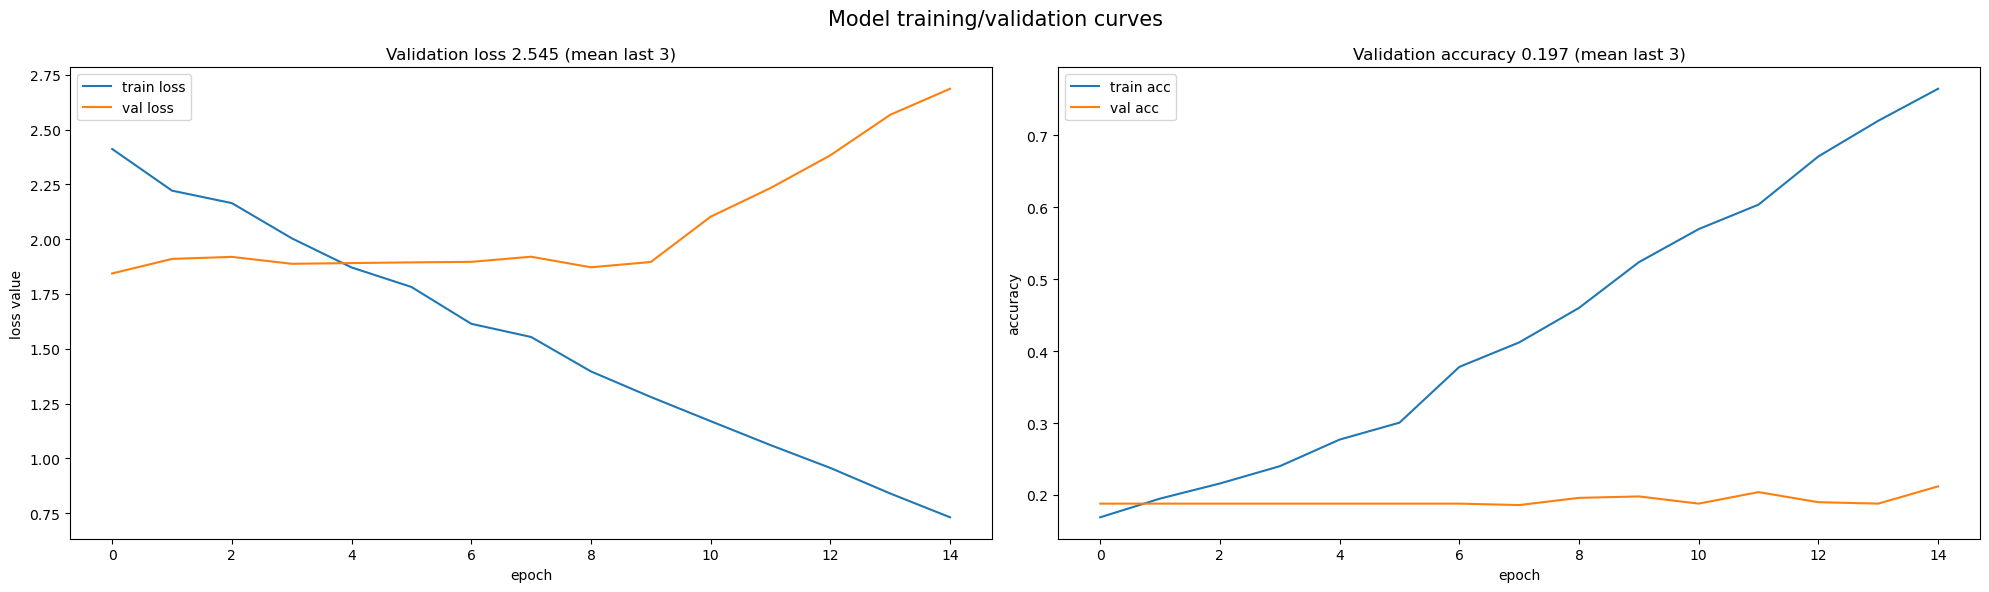

In [115]:
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('Model training/validation curves', size=15)

# Plot loss values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["acc"], label="train acc")
ax2.plot(history.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.tight_layout()
plt.show()

In [116]:
test_loss, test_acc = model.evaluate(X_va_seq,y_va)

print('Validation loss:', test_loss)
print('Validation accuracy:', test_acc)

16/16 [==============================] - 2s 104ms/step - loss: 2.6863 - acc: 0.2120
Validation loss: 2.6862964630126953
Validation accuracy: 0.21199999749660492


In [117]:
# Compute validation set predictions
pred = [np.argmax(i) for i in model.predict(X_va_seq)]

16/16 [==============================] - 4s 114ms/step


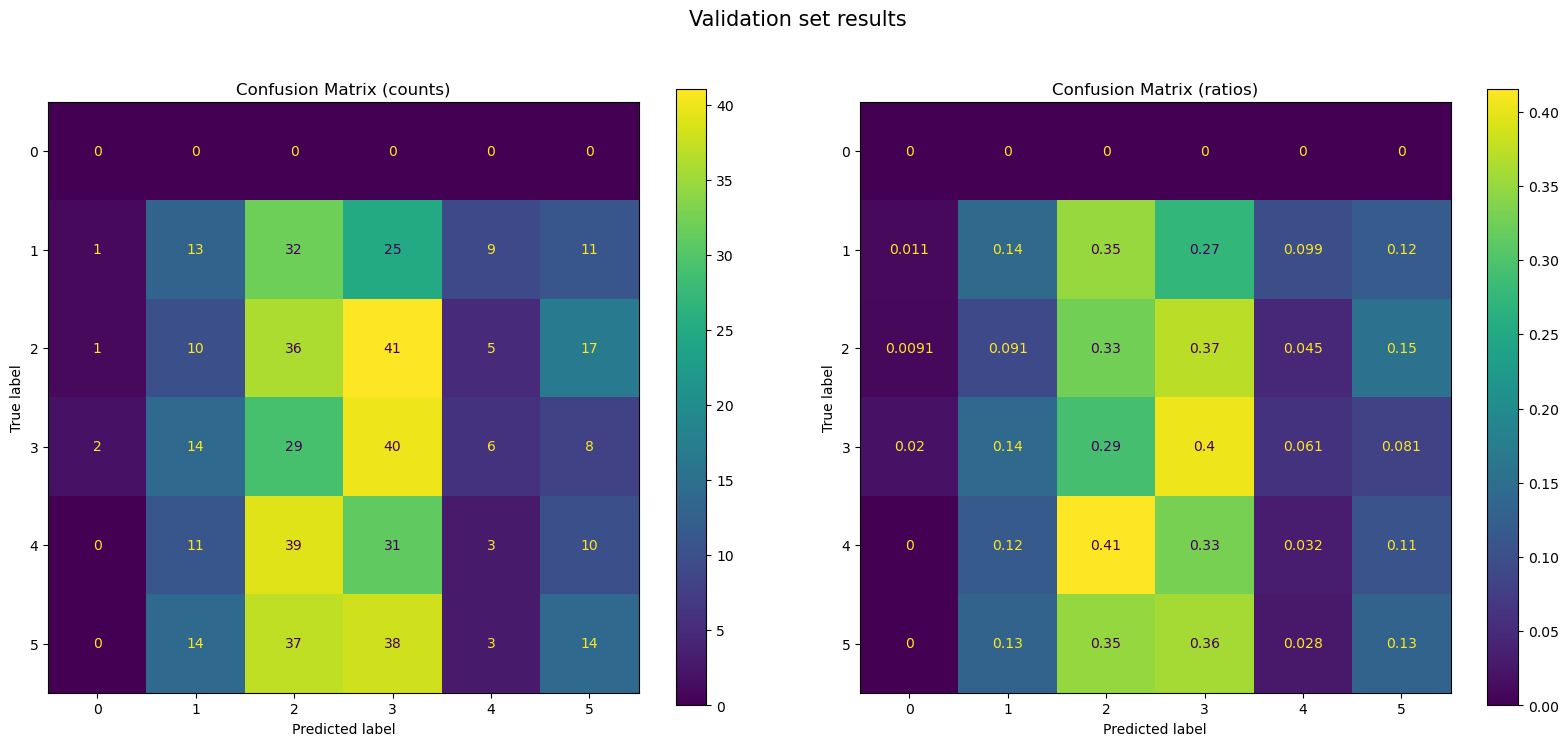

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix for raw counts
cm_raw = confusion_matrix(y_va, pred)

# Compute confusion matrix for normalized ratios
cm_norm = confusion_matrix(y_va, pred, normalize='true')

# Create confusion matrix plots
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm_raw)
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm)

# Plot confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={"width_ratios": [10, 10], "wspace": 0.1}, subplot_kw={"aspect":"equal"})
plt.suptitle('Validation set results', size = 15)
disp_raw.plot(ax=axs[0])
axs[0].set_title('Confusion Matrix (counts)')
disp_norm.plot(ax=axs[1])
axs[1].set_title('Confusion Matrix (ratios)')
plt.show()

In [119]:
# Compute test set predictions
predictions = [np.argmax(i) for i in model.predict(X_te_seq)]
    
# Create a new DataFrame to merge review ids and the model predictions
submission = pd.DataFrame({'sentiment': predictions})

# Check few random entries
submission.sample(10)

9/9 [==============================] - 1s 97ms/step


,sentiment
6,1
103,2
241,3
225,2
123,2
22,1
89,3
124,3
21,3
190,5


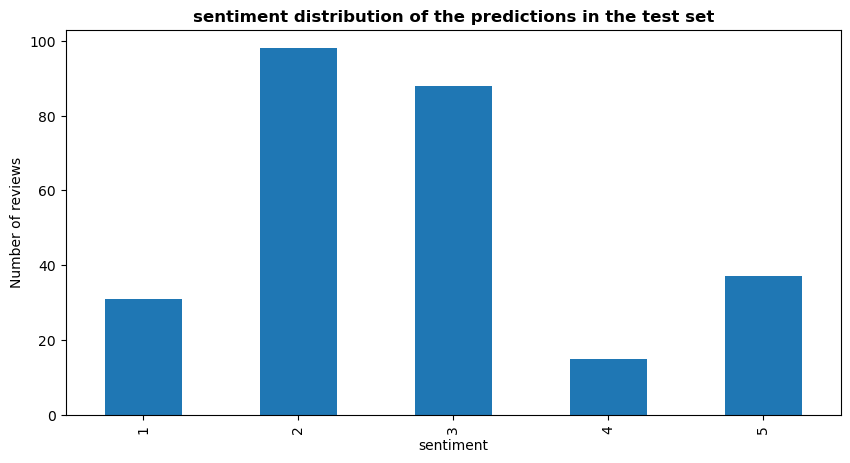

In [120]:
# Check target balance
submission['sentiment'].value_counts().sort_index().plot.bar(figsize=(10,5))
plt.title('sentiment distribution of the predictions in the test set', fontweight="bold")
plt.xlabel('sentiment')
plt.ylabel('Number of reviews')
plt.show()

In [121]:
test_loss, test_acc = model.evaluate(X_va_seq,y_va)

print('Validation loss:', test_loss)
print('Validation accuracy:', test_acc)

16/16 [==============================] - 2s 104ms/step - loss: 2.6863 - acc: 0.2120
Validation loss: 2.6862964630126953
Validation accuracy: 0.21199999749660492
